In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## LOADING THE BOSTON HOUSE PRICING DATASET

In [34]:
boston_df = pd.read_csv(r"dataset\BostonHousing.csv")

In [35]:
boston_df.keys()

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [36]:
boston_df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [37]:
boston_df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [83]:
boston_df['rm'] = pd.to_numeric(boston_df['rm'], errors='coerce')


In [84]:
boston_df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [40]:
boston_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [41]:
# Filling the missing values
boston_df['rm'] = boston_df['rm'].fillna(boston_df['rm'].mean())

In [42]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [43]:
#target
boston_df.medv

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

## Exploratory data analysis


In [44]:
boston_df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219261,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.310847,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.392052,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091434,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302051,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219261,0.310847,-0.392052,0.091434,-0.302051,1.000000,-0.239632,0.202268,-0.210353,-0.292178,-0.356065,0.127998,-0.614526,0.695375
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.239632,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.202268,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.210353,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292178,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Text(0, 0.5, 'Price')

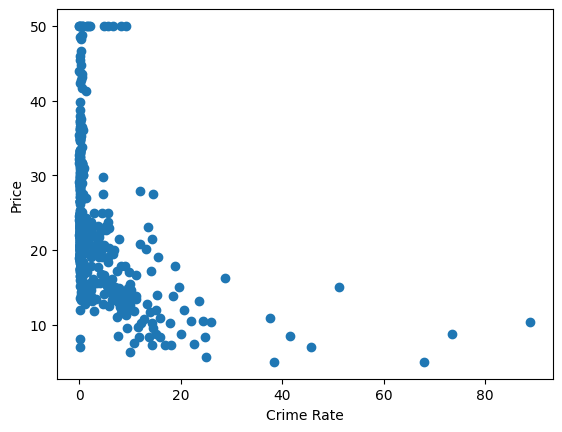

In [46]:
plt.scatter(boston_df['crim'],boston_df['medv'])
plt.xlabel("Crime Rate")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

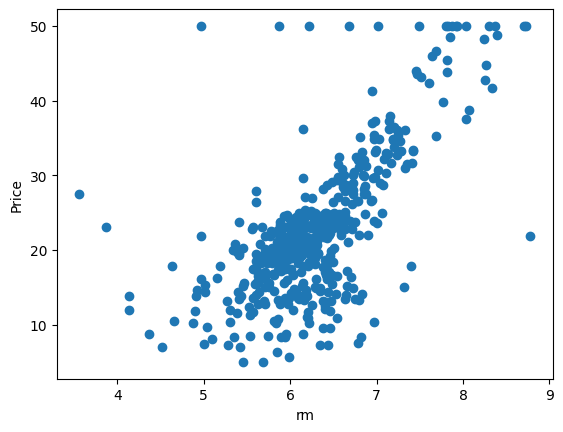

In [47]:
plt.scatter(boston_df['rm'],boston_df['medv'])
plt.xlabel("rm")
plt.ylabel("Price")

<Axes: xlabel='rm', ylabel='medv'>

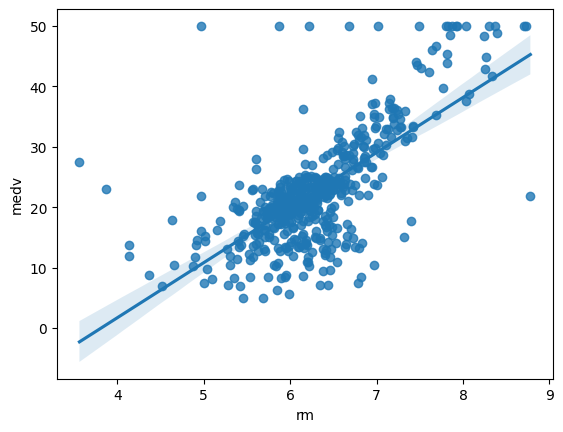

In [48]:
import seaborn as sns
sns.regplot(x='rm',y ='medv',data = boston_df)
#as the number of rooms are incresing the price is also incresing

<Axes: xlabel='tax', ylabel='medv'>

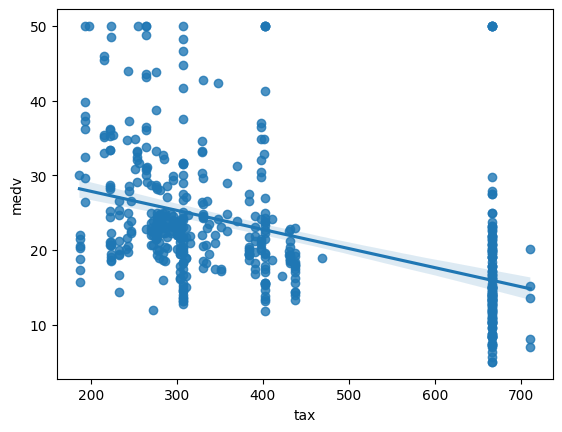

In [49]:
sns.regplot(x='tax',y ='medv',data = boston_df)
#as the tax increases the price slightly decreses

<Axes: xlabel='ptratio', ylabel='medv'>

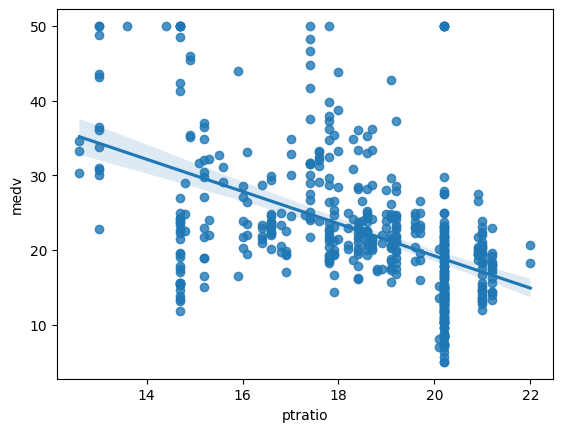

In [50]:
sns.regplot(x='ptratio',y ='medv',data = boston_df)
# as the price decreases the ptratio increases

In [51]:
#Independent and Dependent features
X = boston_df.drop("medv",axis = 1)
Y = boston_df["medv"]

In [52]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [53]:
#Train test split
from sklearn.model_selection import train_test_split
X_train ,X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3 , random_state=42)

In [54]:
X_train


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
116,0.13158,0.0,10.01,0,0.547,6.176,72.5,2.7301,6,432,17.8,393.30,12.04
45,0.17142,0.0,6.91,0,0.448,5.682,33.8,5.1004,3,233,17.9,396.90,10.21
16,1.05393,0.0,8.14,0,0.538,5.935,29.3,4.4986,4,307,21.0,386.85,6.58
468,15.57570,0.0,18.10,0,0.580,5.926,71.0,2.9084,24,666,20.2,368.74,18.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.520,5.836,91.9,2.2110,5,384,20.9,395.67,18.66
270,0.29916,20.0,6.96,0,0.464,5.856,42.1,4.4290,3,223,18.6,388.65,13.00
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
435,11.16040,0.0,18.10,0,0.740,6.629,94.6,2.1247,24,666,20.2,109.85,23.27


In [55]:
##standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [56]:
X_train = scaler.fit_transform(X_train)#learns new parameters

In [57]:
X_test = scaler.transform(X_test)# applies existing parameters

## Model Training


In [58]:
from sklearn.linear_model import LinearRegression


In [63]:
model = LinearRegression()

In [64]:
model.fit(X_train,Y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [65]:
##print the coefficients and the intercept
print(model.coef_)

[-1.10823836  0.81189823  0.35257783  0.81518768 -1.79607311  2.90447276
 -0.29378061 -2.93049502  2.09664195 -1.44672618 -2.05845103  1.02339256
 -3.88893987]


In [66]:
print(model.intercept_)

23.015819209039545


In [67]:
#prediciton with test data
model_pred = model.predict(X_test)
model_pred

array([28.63252461, 36.48602086, 15.4189334 , 25.39319615, 18.85542687,
       23.14196315, 17.38803819, 14.06783335, 23.04060004, 20.58567038,
       24.8304966 , 18.54903944, -6.85534914, 21.79886221, 19.22195173,
       26.18174676, 20.2844755 ,  5.62300497, 40.43768792, 17.57865999,
       27.42731845, 30.15917866, 10.93074566, 23.99706963, 18.07925258,
       15.94318816, 23.12256494, 14.55801939, 22.33614573, 19.31522404,
       22.15661595, 25.17988256, 25.29889979, 18.5274093 , 16.62345866,
       17.52123633, 30.9352234 , 20.18058657, 23.9016633 , 24.85660195,
       13.92840266, 31.80230979, 42.55820862, 17.62362431, 26.99706912,
       17.19500817, 13.7957965 , 26.0889121 , 20.31719055, 30.07798888,
       21.32984607, 34.14817303, 15.58954428, 26.08619306, 39.29980093,
       22.99527802, 18.95885672, 33.04454222, 24.83380987, 12.93150916,
       20.74721067, 30.80662141, 31.61362771, 16.28330058, 21.09350412,
       16.58402988, 20.35925216, 26.14458437, 31.05928094, 11.99

## Assumptions

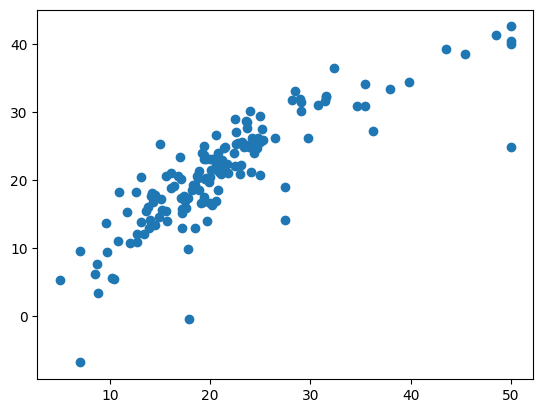

In [68]:
## plot a scatter plot for the prediction
plt.scatter(Y_test, model_pred)

In [ ]:
##residuals~> prediction error
residuals  = Y_test - model_pred

In [71]:
residuals

173    -5.032525
274    -4.086021
491    -1.818933
72     -2.593196
452    -2.755427
         ...    
441    -0.301415
23      1.123598
225    10.053915
433    -2.382093
447    -5.687081
Name: medv, Length: 152, dtype: float64

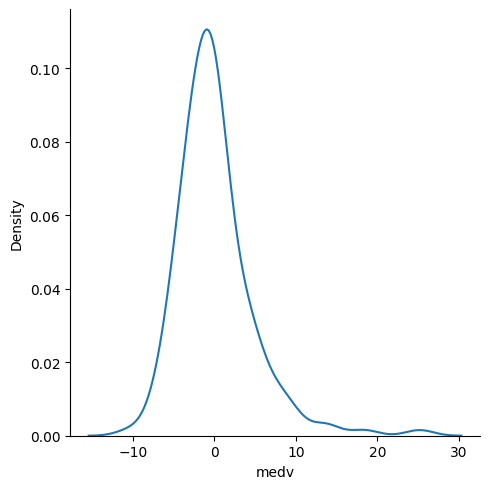

In [72]:
##plotting the residuals
sns.displot(residuals,kind ="kde")

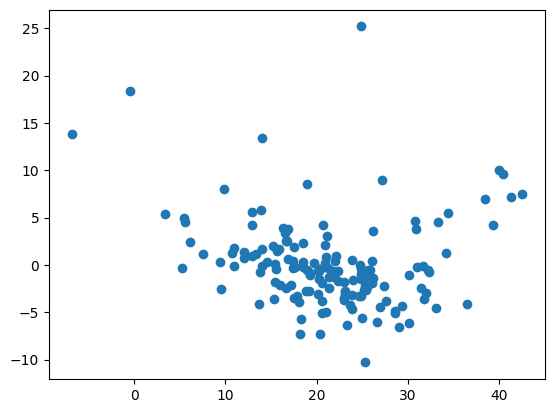

In [ ]:
##Scatter plot w.r.t prediction and residuals
## uniform distribution is a good sign
plt.scatter(model_pred,residuals)

In [75]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(Y_test,model_pred))
print(mean_squared_error(Y_test,model_pred))
print(np.sqrt(mean_squared_error(Y_test,model_pred)))

3.173988672754929
21.598288672542022
4.647395902281408


## R square and adjusted R square

Formula

R^2 = 1-SSR/SST

SSR~> sum of square residual
SST~> sum of square Total




In [77]:
from sklearn.metrics import r2_score
score = r2_score(Y_test,model_pred)
print(score)

0.7101410361770548


Adjusted R^2 = 1 -[(1-R^2)*(n-1)/(n-k-1)]

n~> number of observations
k~> number of predictions

adjusted R^2 should be < R^2

In [78]:
1-(1- score)*(len(Y_test) - 1)/(len(Y_test)- X_test.shape[1]- 1)

0.6828354816140237

## New data predictions

In [106]:
new = boston_df.drop("medv" ,axis =1).head(1).to_numpy().reshape(1,-1)

In [109]:
#transformation of new data
tuned_new = scaler.transform(new)

c:\Users\saiim\OneDrive\Desktop\ML_project2\btenv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [110]:
model.predict(tuned_new)

array([30.07798888])